### Import dataset

In [357]:
import pandas as pd
df = pd.read_csv("emails.csv")
print(f"shape of dataset:{df.shape}")
df.head(10)

shape of dataset:(5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


### Preprocessing

In [358]:
df.isnull().sum().sum()

np.int64(0)

In [359]:
df.dropna()
print(f"shape of dataset:{df.shape}")

shape of dataset:(5172, 3002)


### Split data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Email No.", "Prediction"])
y = df["Prediction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (3620, 3000) (3620,)
Test set: (1552, 3000) (1552,)


### Train and save the model

In [361]:
from sklearn.naive_bayes import MultinomialNB
import pickle

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Save the trained model
with open('spam_detector_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

### Evaluate the model

F1 Score: 0.9154334038054969


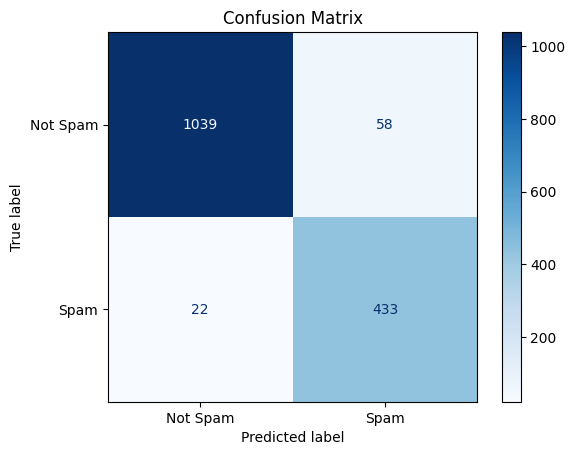

In [362]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Spam", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Test email content from user input

In [363]:
import pickle
from collections import Counter

def text_to_word_list(text):
    text = text.lower()
    words = text.split()  
    return words


def spam_email_prediction(email_content):

    with open('spam_detector_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    word_list = text_to_word_list(email_content)
    word_list_count = Counter(word_list)

    df = pd.DataFrame([word_list_count])
    features = model.feature_names_in_
    df = df.reindex(columns=features, fill_value=0)
      
    prediction = model.predict(df)
    return "Spam" if prediction[0] == 1 else "not Spam"

content = input("Enter content of the email:")
type = spam_email_prediction(content)
print(f"The email is {type}")

The email is Spam
